<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/regression_ransac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

style.use('seaborn-talk')

krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing.data', header=None, sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO',
              'B','LSTAT','MEDV']

In [0]:
X = df[['RM']].values
y = df['MEDV'].values

In [25]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50,
                         residual_threshold=5.0, random_state=0)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [26]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [0]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [0]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])

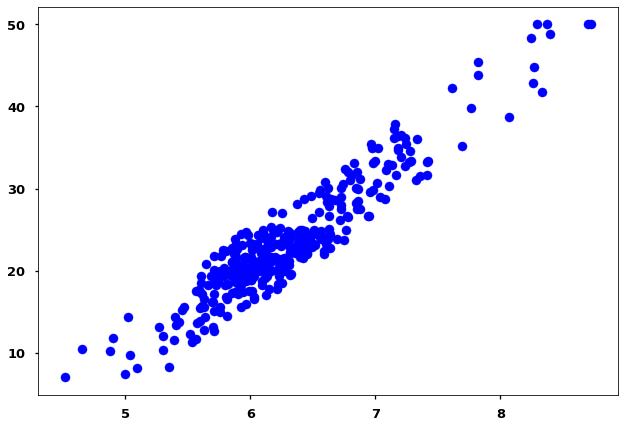

In [40]:
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')

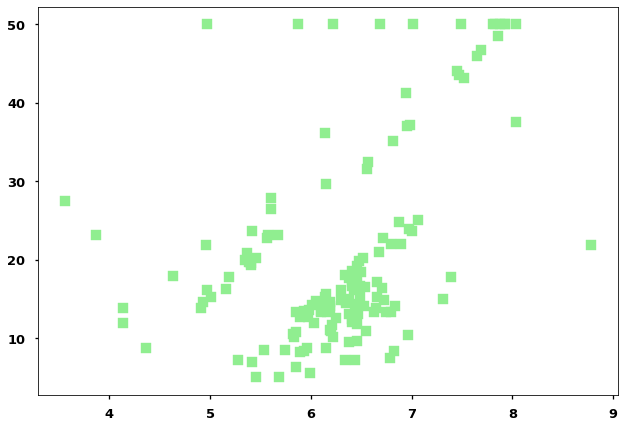

In [42]:
plt.scatter(X[outlier_mask],y[outlier_mask], c='lightgreen', marker='s',label='Outliers')

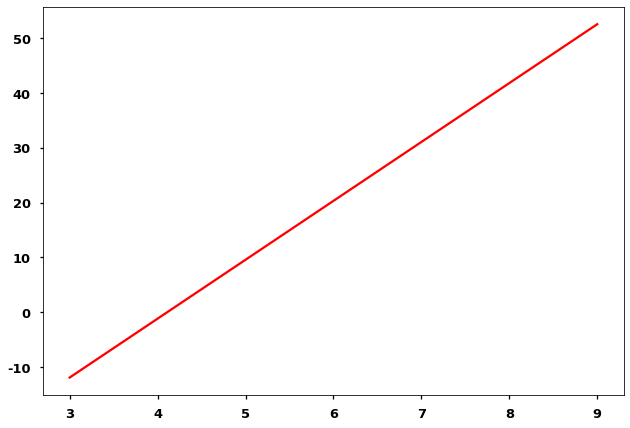

In [44]:
plt.plot(line_X, line_y_ransac, c='red')

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Gly

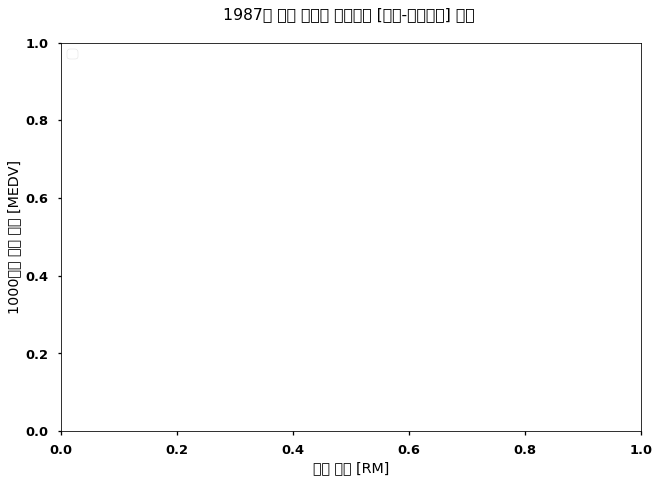

In [46]:
plt.xlabel('평균 방수 [RM]')
plt.ylabel('1000달러 단위 집값 [MEDV]')
plt.title('1987년 미국 보스턴 외곽지역 [방수-주택가격] 추이 \n')
plt.legend(loc=2)
plt.show()

In [0]:
slope = ransac.estimator_.coef_[0]

In [0]:
intercept = ransac.estimator_.intercept_

In [55]:
print('회귀선 기울기: %.3f\n 절편: %.3f' %(slope, intercept))

회귀선 기울기: 10.735
 절편: -44.089
